In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
read = pd.read_csv('H2HBABBA1887.csv')
df = pd.DataFrame(read)
df.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                 object
buisness_year             float64
doc_id                    float64
posting_date               object
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
invoice_currency           object
document type              object
posting_id                float64
area_business             float64
total_open_amount         float64
baseline_create_date      float64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [3]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930815e+09,2020-04-28,20200422,20200428,20200513.0,USD,RV,1.0,NaN,6361.07,20200428.0,NAH4,1.930815e+09,1
1,U001,0200729828,KENNETH foundation,2019-09-25 00:00:00,2019.0,1.929826e+09,2019-09-06,20190903,20190906,20190926.0,USD,RV,1.0,NaN,27848.46,20190906.0,NAD1,1.929826e+09,0
2,U001,CCU013,KRAFT F trust,NaN,2020.0,1.930666e+09,2020-03-16,20200317,20200316,20200316.0,USD,RV,1.0,NaN,5095.68,20200316.0,NAX2,1.930666e+09,1
3,U001,0200780383,MEIJ us,2019-09-30 00:00:00,2019.0,1.929852e+09,2019-09-09,20190909,20190909,20190924.0,USD,RV,1.0,NaN,81781.59,20190909.0,NAA8,1.929852e+09,0
4,U001,0200792293,UNIFIE llc,2019-11-22 00:00:00,2019.0,1.930113e+09,2019-11-05,20191105,20191105,20191120.0,USD,RV,1.0,NaN,67352.17,20191105.0,NAA8,1.930113e+09,0


In [4]:
# Removing NaN(area_business) column
df = df.drop(['area_business'], axis=1)
df.shape

(50000, 18)

In [5]:
testData = df[df.clear_date.isnull()]
testData.shape

(10000, 18)

In [6]:
trainData = df[df.clear_date.notnull()]
trainData.shape

(40000, 18)

In [7]:
trainData['clear_date'] = pd.to_datetime(trainData.clear_date)
trainData['posting_date'] = pd.to_datetime(trainData.posting_date)

trainData['document_create_date'] = pd.to_datetime(trainData['document_create_date'], format='%Y%m%d')
trainData['document_create_date.1'] = pd.to_datetime(trainData['document_create_date.1'], format='%Y%m%d')

trainData['due_in_date'] = trainData['due_in_date'].astype(int)
trainData['baseline_create_date'] = trainData['baseline_create_date'].astype(int)

trainData['due_in_date'] = pd.to_datetime(trainData['due_in_date'], format='%Y%m%d')
trainData['baseline_create_date'] = pd.to_datetime(trainData['baseline_create_date'], format='%Y%m%d')
trainData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1,U001,0200729828,KENNETH foundation,2019-09-25,2019.0,1.929826e+09,2019-09-06,2019-09-03,2019-09-06,2019-09-26,USD,RV,1.0,27848.46,2019-09-06,NAD1,1.929826e+09,0
3,U001,0200780383,MEIJ us,2019-09-30,2019.0,1.929852e+09,2019-09-09,2019-09-09,2019-09-09,2019-09-24,USD,RV,1.0,81781.59,2019-09-09,NAA8,1.929852e+09,0
4,U001,0200792293,UNIFIE llc,2019-11-22,2019.0,1.930113e+09,2019-11-05,2019-11-05,2019-11-05,2019-11-20,USD,RV,1.0,67352.17,2019-11-05,NAA8,1.930113e+09,0
5,U001,0200833713,JETRO llc,2019-04-09,2019.0,1.929002e+09,2019-03-20,2019-03-20,2019-03-20,2019-04-04,USD,RV,1.0,1696.56,2019-03-20,NAA8,1.929002e+09,0
6,U001,0200769623,WAL-MAR corp,2020-02-24,2020.0,1.930510e+09,2020-02-10,2020-02-10,2020-02-10,2020-02-25,USD,RV,1.0,14213.45,2020-02-10,NAH4,1.930510e+09,0


In [8]:
# using to ordinal function to convert time date to proleptic Gregorian ordinal (no. of days from 01/01/01 to current date)
trainData['clear_date']=trainData['clear_date'].map(dt.datetime.toordinal)
trainData['posting_date']=trainData['posting_date'].map(dt.datetime.toordinal)
trainData['document_create_date']=trainData['document_create_date'].map(dt.datetime.toordinal)
trainData['document_create_date.1']=trainData['document_create_date.1'].map(dt.datetime.toordinal)
trainData['due_in_date']=trainData['due_in_date'].map(dt.datetime.toordinal)
trainData['baseline_create_date']=trainData['baseline_create_date'].map(dt.datetime.toordinal)

trainData.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                  int64
buisness_year             float64
doc_id                    float64
posting_date                int64
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [9]:
trainData.sort_values(['posting_date'], inplace=True, ignore_index=False)
trainData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
16374,U001,0200769623,WAL-MAR in,737068,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,1.0,4763.88,737058,NAH4,1.928539e+09,0
34352,U001,0200769623,WAL-MAR,737068,2019.0,1.928534e+09,737058,737057,737058,737073,USD,RV,1.0,15753.54,737058,NAH4,1.928534e+09,0
26036,U001,0200769623,WAL-MAR,737074,2019.0,1.928542e+09,737058,737057,737058,737073,USD,RV,1.0,12491.86,737058,NAH4,1.928542e+09,0
14040,U001,CCU013,KRAFT F foundation,737119,2019.0,1.928517e+09,737058,737059,737058,737058,USD,RV,1.0,17592.60,737058,NAX2,1.928517e+09,0
14023,U001,0200726979,BJ'S us,737074,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,1.0,116.38,737058,NAA8,1.928539e+09,0


In [10]:
trainData.isnull().mean()

business_code             0.000000
cust_number               0.000000
name_customer             0.000000
clear_date                0.000000
buisness_year             0.000000
doc_id                    0.000000
posting_date              0.000000
document_create_date      0.000000
document_create_date.1    0.000000
due_in_date               0.000000
invoice_currency          0.000000
document type             0.000000
posting_id                0.000000
total_open_amount         0.000000
baseline_create_date      0.000000
cust_payment_terms        0.000000
invoice_id                0.000225
isOpen                    0.000000
dtype: float64

In [11]:
trainData.dropna(subset=["invoice_id"],inplace=True)
trainData.shape

(39991, 18)

In [12]:
trainData.isnull().sum()

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
posting_id                0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                0
isOpen                    0
dtype: int64

In [13]:
trainData.duplicated().sum()

868

In [14]:
trainData.loc[trainData.duplicated(), :]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
5514,U001,0200769623,WAL-MAR corp,737074,2019.0,1.928541e+09,737058,737057,737058,737073,USD,RV,1.0,11682.88,737058,NAH4,1.928541e+09,0
28673,U001,0200726979,BJ'S us,737074,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,1.0,116.38,737058,NAA8,1.928539e+09,0
5482,U001,0200769623,WAL-MAR co,737068,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,1.0,11582.37,737058,NAH4,1.928539e+09,0
10144,U001,0200769623,WAL-MAR,737073,2019.0,1.928547e+09,737061,737060,737061,737076,USD,RV,1.0,15.74,737061,NAH4,1.928547e+09,0
30073,U001,0200078795,H T H associates,737081,2019.0,1.928554e+09,737061,737061,737061,737076,USD,RV,1.0,851.26,737061,NAA8,1.928554e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28173,U001,0200723794,MID MO co,737556,2020.0,1.930565e+09,737479,737479,737479,737544,USD,RV,1.0,865.54,737479,NAGD,1.930565e+09,0
30778,U001,0200726979,BJ'S corporation,737495,2020.0,1.930565e+09,737480,737479,737480,737495,USD,RV,1.0,221.57,737480,NAA8,1.930565e+09,0
30669,U001,0200769623,WAL-MAR systems,737497,2020.0,1.930566e+09,737480,737480,737480,737495,USD,RV,1.0,4872.22,737480,NAH4,1.930566e+09,0
23989,U001,0200707822,PUBLI trust,737495,2020.0,1.930566e+09,737480,737480,737480,737495,USD,RV,1.0,63921.25,737480,NAA8,1.930566e+09,0


In [15]:
trainData.drop_duplicates(keep='first', inplace=True)
trainData.shape

(39123, 18)

In [16]:
trainData.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                  int64
buisness_year             float64
doc_id                    float64
posting_date                int64
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [17]:
from sklearn.feature_selection import VarianceThreshold
trainData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
16374,U001,0200769623,WAL-MAR in,737068,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,1.0,4763.88,737058,NAH4,1.928539e+09,0
34352,U001,0200769623,WAL-MAR,737068,2019.0,1.928534e+09,737058,737057,737058,737073,USD,RV,1.0,15753.54,737058,NAH4,1.928534e+09,0
26036,U001,0200769623,WAL-MAR,737074,2019.0,1.928542e+09,737058,737057,737058,737073,USD,RV,1.0,12491.86,737058,NAH4,1.928542e+09,0
14040,U001,CCU013,KRAFT F foundation,737119,2019.0,1.928517e+09,737058,737059,737058,737058,USD,RV,1.0,17592.60,737058,NAX2,1.928517e+09,0
14023,U001,0200726979,BJ'S us,737074,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,1.0,116.38,737058,NAA8,1.928539e+09,0


In [18]:
trainData.dtypes

business_code              object
cust_number                object
name_customer              object
clear_date                  int64
buisness_year             float64
doc_id                    float64
posting_date                int64
document_create_date        int64
document_create_date.1      int64
due_in_date                 int64
invoice_currency           object
document type              object
posting_id                float64
total_open_amount         float64
baseline_create_date        int64
cust_payment_terms         object
invoice_id                float64
isOpen                      int64
dtype: object

In [19]:
trainDataTemp = trainData.select_dtypes(exclude=['object'])
trainData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
16374,U001,0200769623,WAL-MAR in,737068,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,1.0,4763.88,737058,NAH4,1.928539e+09,0
34352,U001,0200769623,WAL-MAR,737068,2019.0,1.928534e+09,737058,737057,737058,737073,USD,RV,1.0,15753.54,737058,NAH4,1.928534e+09,0
26036,U001,0200769623,WAL-MAR,737074,2019.0,1.928542e+09,737058,737057,737058,737073,USD,RV,1.0,12491.86,737058,NAH4,1.928542e+09,0
14040,U001,CCU013,KRAFT F foundation,737119,2019.0,1.928517e+09,737058,737059,737058,737058,USD,RV,1.0,17592.60,737058,NAX2,1.928517e+09,0
14023,U001,0200726979,BJ'S us,737074,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,1.0,116.38,737058,NAA8,1.928539e+09,0


In [20]:
varThresh = VarianceThreshold(threshold=0)
varThresh.fit(trainDataTemp)

VarianceThreshold(threshold=0)

In [21]:
varThresh.get_support()

array([ True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [22]:
trainDataTemp.columns[varThresh.get_support()]

Index(['clear_date', 'buisness_year', 'doc_id', 'posting_date',
       'document_create_date', 'document_create_date.1', 'due_in_date',
       'total_open_amount', 'baseline_create_date', 'invoice_id'],
      dtype='object')

In [23]:
constCol = [column for column in trainDataTemp.columns
            if column not in trainDataTemp.columns[varThresh.get_support()]]

for features in constCol:
    print(features)

posting_id
isOpen


In [24]:
trainData.drop(constCol, axis=1, inplace=True)
trainData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
16374,U001,0200769623,WAL-MAR in,737068,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,4763.88,737058,NAH4,1.928539e+09
34352,U001,0200769623,WAL-MAR,737068,2019.0,1.928534e+09,737058,737057,737058,737073,USD,RV,15753.54,737058,NAH4,1.928534e+09
26036,U001,0200769623,WAL-MAR,737074,2019.0,1.928542e+09,737058,737057,737058,737073,USD,RV,12491.86,737058,NAH4,1.928542e+09
14040,U001,CCU013,KRAFT F foundation,737119,2019.0,1.928517e+09,737058,737059,737058,737058,USD,RV,17592.60,737058,NAX2,1.928517e+09
14023,U001,0200726979,BJ'S us,737074,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,116.38,737058,NAA8,1.928539e+09


In [25]:
trainData.shape

(39123, 16)

In [26]:
trainDataTemp = trainData.select_dtypes(exclude=['object'])
trainData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
16374,U001,0200769623,WAL-MAR in,737068,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,4763.88,737058,NAH4,1.928539e+09
34352,U001,0200769623,WAL-MAR,737068,2019.0,1.928534e+09,737058,737057,737058,737073,USD,RV,15753.54,737058,NAH4,1.928534e+09
26036,U001,0200769623,WAL-MAR,737074,2019.0,1.928542e+09,737058,737057,737058,737073,USD,RV,12491.86,737058,NAH4,1.928542e+09
14040,U001,CCU013,KRAFT F foundation,737119,2019.0,1.928517e+09,737058,737059,737058,737058,USD,RV,17592.60,737058,NAX2,1.928517e+09
14023,U001,0200726979,BJ'S us,737074,2019.0,1.928539e+09,737058,737057,737058,737073,USD,RV,116.38,737058,NAA8,1.928539e+09


In [27]:
varThresh = VarianceThreshold(threshold=0.3)
varThresh.fit(trainDataTemp)

VarianceThreshold(threshold=0.3)

In [28]:
varSupp = varThresh.get_support()
varSupp

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True])

In [29]:
trainDataTemp.columns[varSupp]

Index(['clear_date', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'total_open_amount',
       'baseline_create_date', 'invoice_id'],
      dtype='object')

In [30]:
quasiCol = [column for column in trainDataTemp.columns
            if column not in trainDataTemp.columns[varSupp]]

for features in quasiCol:
    print(features)

buisness_year


In [31]:
trainData.drop(quasiCol, axis=1, inplace=True)
print(trainData.shape)
trainData.head()

(39123, 15)


,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
16374,U001,0200769623,WAL-MAR in,737068,1.928539e+09,737058,737057,737058,737073,USD,RV,4763.88,737058,NAH4,1.928539e+09
34352,U001,0200769623,WAL-MAR,737068,1.928534e+09,737058,737057,737058,737073,USD,RV,15753.54,737058,NAH4,1.928534e+09
26036,U001,0200769623,WAL-MAR,737074,1.928542e+09,737058,737057,737058,737073,USD,RV,12491.86,737058,NAH4,1.928542e+09
14040,U001,CCU013,KRAFT F foundation,737119,1.928517e+09,737058,737059,737058,737058,USD,RV,17592.60,737058,NAX2,1.928517e+09
14023,U001,0200726979,BJ'S us,737074,1.928539e+09,737058,737057,737058,737073,USD,RV,116.38,737058,NAA8,1.928539e+09


In [32]:
for col in trainData:
    if trainData[col].dtypes == object:
        print(col , ' : ', len(trainData[col].unique()))

business_code  :  6
cust_number  :  1348
name_customer  :  3912
invoice_currency  :  2
document type  :  1
cust_payment_terms  :  70


In [33]:
trainDataFrqMap = trainData.business_code.value_counts().to_dict()
trainData.business_code = trainData.business_code.map(trainDataFrqMap)
trainData.head()

,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
16374,35430,0200769623,WAL-MAR in,737068,1.928539e+09,737058,737057,737058,737073,USD,RV,4763.88,737058,NAH4,1.928539e+09
34352,35430,0200769623,WAL-MAR,737068,1.928534e+09,737058,737057,737058,737073,USD,RV,15753.54,737058,NAH4,1.928534e+09
26036,35430,0200769623,WAL-MAR,737074,1.928542e+09,737058,737057,737058,737073,USD,RV,12491.86,737058,NAH4,1.928542e+09
14040,35430,CCU013,KRAFT F foundation,737119,1.928517e+09,737058,737059,737058,737058,USD,RV,17592.60,737058,NAX2,1.928517e+09
14023,35430,0200726979,BJ'S us,737074,1.928539e+09,737058,737057,737058,737073,USD,RV,116.38,737058,NAA8,1.928539e+09


In [34]:
trainDataTemp = pd.get_dummies(trainData['invoice_currency'], drop_first=True)
trainData = pd.concat([trainDataTemp, trainData], axis=1)

In [35]:

trainData.drop('invoice_currency', axis=1, inplace=True)
trainData.head()

,USD,business_code,cust_number,name_customer,clear_date,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
16374,1,35430,0200769623,WAL-MAR in,737068,1.928539e+09,737058,737057,737058,737073,RV,4763.88,737058,NAH4,1.928539e+09
34352,1,35430,0200769623,WAL-MAR,737068,1.928534e+09,737058,737057,737058,737073,RV,15753.54,737058,NAH4,1.928534e+09
26036,1,35430,0200769623,WAL-MAR,737074,1.928542e+09,737058,737057,737058,737073,RV,12491.86,737058,NAH4,1.928542e+09
14040,1,35430,CCU013,KRAFT F foundation,737119,1.928517e+09,737058,737059,737058,737058,RV,17592.60,737058,NAX2,1.928517e+09
14023,1,35430,0200726979,BJ'S us,737074,1.928539e+09,737058,737057,737058,737073,RV,116.38,737058,NAA8,1.928539e+09


In [36]:
trainData.shape

(39123, 15)

In [37]:
trainData.drop(['cust_number','name_customer','document type','document_create_date.1'] , axis = 1 , inplace = True)
trainData.shape

(39123, 11)

In [38]:
trainData['delay'] = trainData['clear_date'] - trainData['due_in_date']
trainData.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
16374,1,35430,737068,1.928539e+09,737058,737057,737073,4763.88,737058,NAH4,1.928539e+09,-5
34352,1,35430,737068,1.928534e+09,737058,737057,737073,15753.54,737058,NAH4,1.928534e+09,-5
26036,1,35430,737074,1.928542e+09,737058,737057,737073,12491.86,737058,NAH4,1.928542e+09,1
14040,1,35430,737119,1.928517e+09,737058,737059,737058,17592.60,737058,NAX2,1.928517e+09,61
14023,1,35430,737074,1.928539e+09,737058,737057,737073,116.38,737058,NAA8,1.928539e+09,1


In [39]:
trainDataFrqMap = trainData.cust_payment_terms.value_counts().to_dict()
trainDataFrqMap

{'NAA8': 15535,
 'NAH4': 10477,
 'CA10': 2980,
 'NAC6': 1371,
 'NAM4': 1031,
 'NAAX': 991,
 'NAD1': 777,
 'NAG2': 706,
 'NAU5': 663,
 'NA32': 625,
 'NAGD': 617,
 'NAX2': 565,
 'NAM2': 462,
 'NA10': 325,
 'NAD5': 271,
 'NAM1': 235,
 'NAVE': 228,
 'NAVF': 199,
 'NAAW': 165,
 'NAVQ': 104,
 'NAWU': 100,
 'NAWN': 94,
 'NAVR': 82,
 'NAWP': 54,
 'NAUZ': 51,
 'NAVM': 40,
 'NABG': 38,
 'NACB': 37,
 'NA3B': 36,
 'CA30': 32,
 'NA38': 26,
 'NAD4': 24,
 'C106': 19,
 'NAB1': 17,
 'NAVL': 17,
 'NA84': 16,
 'NAUP': 11,
 'NA9X': 9,
 'BR56': 8,
 'NAM3': 8,
 'NAVC': 8,
 'NA3F': 6,
 'NATW': 5,
 'CAB1': 5,
 'NAD8': 5,
 'NA31': 5,
 'NA25': 4,
 'NAVD': 4,
 'NAUX': 3,
 'NAWM': 3,
 'NATU': 3,
 'CAX2': 3,
 'NATX': 2,
 'B052': 2,
 'NAV9': 2,
 '90M7': 2,
 'NA8Q': 2,
 'NATJ': 1,
 'C129': 1,
 'NATZ': 1,
 'BR12': 1,
 'CA60': 1,
 'NA24': 1,
 'NAUW': 1,
 'B112': 1,
 'NATH': 1,
 'NATM': 1,
 'NAUI': 1,
 'NANC': 1,
 'NACE': 1}

In [40]:
trainData.cust_payment_terms = trainData.cust_payment_terms.map(trainDataFrqMap)
trainData.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
16374,1,35430,737068,1.928539e+09,737058,737057,737073,4763.88,737058,10477,1.928539e+09,-5
34352,1,35430,737068,1.928534e+09,737058,737057,737073,15753.54,737058,10477,1.928534e+09,-5
26036,1,35430,737074,1.928542e+09,737058,737057,737073,12491.86,737058,10477,1.928542e+09,1
14040,1,35430,737119,1.928517e+09,737058,737059,737058,17592.60,737058,565,1.928517e+09,61
14023,1,35430,737074,1.928539e+09,737058,737057,737073,116.38,737058,15535,1.928539e+09,1


Text(0.5, 1.0, 'delay vs cust_payment_terms')

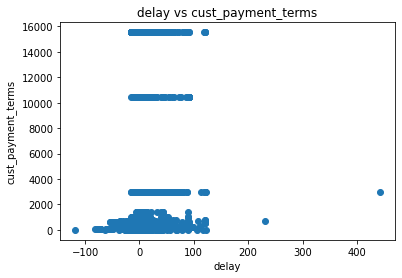

In [41]:
trainX = trainData['delay']
trainY = trainData['cust_payment_terms']
plt.scatter(trainX, trainY)
plt.xlabel("delay")
plt.ylabel("cust_payment_terms")
plt.title("delay vs cust_payment_terms")

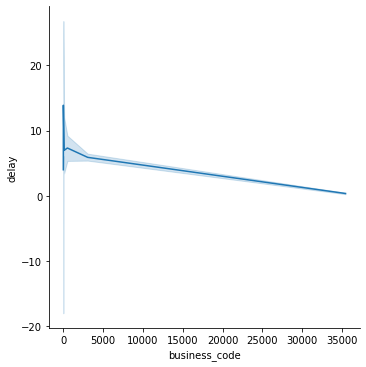

In [42]:
import seaborn as sns
sns.relplot(x="business_code", y="delay", sort=False, kind="line", data=trainData)

Text(0.5, 1.0, 'delay vs posting_date')

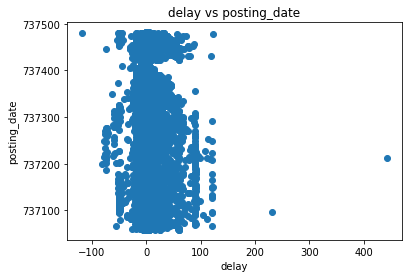

In [43]:
trainX = trainData['delay']
trainY = trainData['posting_date']
plt.scatter(trainX, trainY)
plt.xlabel("delay")
plt.ylabel("posting_date")
plt.title("delay vs posting_date")

<AxesSubplot:xlabel='delay', ylabel='Density'>

<Figure size 432x432 with 0 Axes>

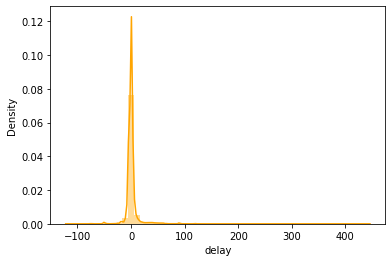

In [44]:
plt.figure(figsize=(6,6))
plt.figure(2)
sns.distplot(trainData['delay'], color='orange')

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

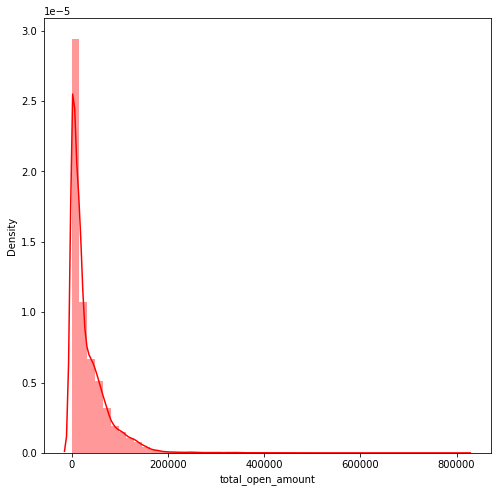

In [45]:
plt.figure(figsize=(8,8))
plt.figure(1)
sns.distplot(trainData['total_open_amount'],color='red')

In [46]:
testData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930815e+09,2020-04-28,20200422,20200428,20200513.0,USD,RV,1.0,6361.07,20200428.0,NAH4,1.930815e+09,1
2,U001,CCU013,KRAFT F trust,NaN,2020.0,1.930666e+09,2020-03-16,20200317,20200316,20200316.0,USD,RV,1.0,5095.68,20200316.0,NAX2,1.930666e+09,1
10,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930711e+09,2020-03-28,20200327,20200328,20200412.0,USD,RV,1.0,31228.04,20200328.0,NAH4,1.930711e+09,1
11,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930843e+09,2020-05-01,20200430,20200501,20200516.0,USD,RV,1.0,40491.29,20200501.0,NAH4,1.930843e+09,1
16,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930838e+09,2020-04-29,20200429,20200429,20200514.0,USD,RV,1.0,18453.58,20200429.0,NAH4,1.930838e+09,1


In [47]:
trainDataTemp = pd.get_dummies(testData['invoice_currency'],drop_first=True)
testData = pd.concat([trainDataTemp,testData],axis=1)
testData.drop('invoice_currency',axis=1,inplace=True)
testData.head()

,USD,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,1,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930815e+09,2020-04-28,20200422,20200428,20200513.0,RV,1.0,6361.07,20200428.0,NAH4,1.930815e+09,1
2,1,U001,CCU013,KRAFT F trust,NaN,2020.0,1.930666e+09,2020-03-16,20200317,20200316,20200316.0,RV,1.0,5095.68,20200316.0,NAX2,1.930666e+09,1
10,1,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930711e+09,2020-03-28,20200327,20200328,20200412.0,RV,1.0,31228.04,20200328.0,NAH4,1.930711e+09,1
11,1,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930843e+09,2020-05-01,20200430,20200501,20200516.0,RV,1.0,40491.29,20200501.0,NAH4,1.930843e+09,1
16,1,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930838e+09,2020-04-29,20200429,20200429,20200514.0,RV,1.0,18453.58,20200429.0,NAH4,1.930838e+09,1


In [48]:
trainDataFrqMap = testData.business_code.value_counts().to_dict()
testData.business_code = testData.business_code.map(trainDataFrqMap)
testData.head()

,USD,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,1,9184,0200769623,WAL-MAR in,NaN,2020.0,1.930815e+09,2020-04-28,20200422,20200428,20200513.0,RV,1.0,6361.07,20200428.0,NAH4,1.930815e+09,1
2,1,9184,CCU013,KRAFT F trust,NaN,2020.0,1.930666e+09,2020-03-16,20200317,20200316,20200316.0,RV,1.0,5095.68,20200316.0,NAX2,1.930666e+09,1
10,1,9184,0200769623,WAL-MAR corp,NaN,2020.0,1.930711e+09,2020-03-28,20200327,20200328,20200412.0,RV,1.0,31228.04,20200328.0,NAH4,1.930711e+09,1
11,1,9184,0200769623,WAL-MAR corporation,NaN,2020.0,1.930843e+09,2020-05-01,20200430,20200501,20200516.0,RV,1.0,40491.29,20200501.0,NAH4,1.930843e+09,1
16,1,9184,0200769623,WAL-MAR corp,NaN,2020.0,1.930838e+09,2020-04-29,20200429,20200429,20200514.0,RV,1.0,18453.58,20200429.0,NAH4,1.930838e+09,1


In [49]:
trainData.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
16374,1,35430,737068,1.928539e+09,737058,737057,737073,4763.88,737058,10477,1.928539e+09,-5
34352,1,35430,737068,1.928534e+09,737058,737057,737073,15753.54,737058,10477,1.928534e+09,-5
26036,1,35430,737074,1.928542e+09,737058,737057,737073,12491.86,737058,10477,1.928542e+09,1
14040,1,35430,737119,1.928517e+09,737058,737059,737058,17592.60,737058,565,1.928517e+09,61
14023,1,35430,737074,1.928539e+09,737058,737057,737073,116.38,737058,15535,1.928539e+09,1


In [50]:
testData['clear_date'] = pd.to_datetime(testData.clear_date)
testData['posting_date'] = pd.to_datetime(testData.posting_date)
testData.head()

testData['document_create_date'] = pd.to_datetime(testData['document_create_date'], format='%Y%m%d')
testData['document_create_date.1'] = pd.to_datetime(testData['document_create_date.1'], format='%Y%m%d')

testData['due_in_date'] = testData['due_in_date'].astype(int)
testData['baseline_create_date'] = testData['baseline_create_date'].astype(int)

testData['due_in_date'] = pd.to_datetime(testData['due_in_date'], format='%Y%m%d')
testData['baseline_create_date'] = pd.to_datetime(testData['baseline_create_date'], format='%Y%m%d')
testData.head()

,USD,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,1,9184,0200769623,WAL-MAR in,NaT,2020.0,1.930815e+09,2020-04-28,2020-04-22,2020-04-28,2020-05-13,RV,1.0,6361.07,2020-04-28,NAH4,1.930815e+09,1
2,1,9184,CCU013,KRAFT F trust,NaT,2020.0,1.930666e+09,2020-03-16,2020-03-17,2020-03-16,2020-03-16,RV,1.0,5095.68,2020-03-16,NAX2,1.930666e+09,1
10,1,9184,0200769623,WAL-MAR corp,NaT,2020.0,1.930711e+09,2020-03-28,2020-03-27,2020-03-28,2020-04-12,RV,1.0,31228.04,2020-03-28,NAH4,1.930711e+09,1
11,1,9184,0200769623,WAL-MAR corporation,NaT,2020.0,1.930843e+09,2020-05-01,2020-04-30,2020-05-01,2020-05-16,RV,1.0,40491.29,2020-05-01,NAH4,1.930843e+09,1
16,1,9184,0200769623,WAL-MAR corp,NaT,2020.0,1.930838e+09,2020-04-29,2020-04-29,2020-04-29,2020-05-14,RV,1.0,18453.58,2020-04-29,NAH4,1.930838e+09,1


In [51]:
testData['clear_date']=testData['clear_date'].map(dt.datetime.toordinal)
testData['posting_date']=testData['posting_date'].map(dt.datetime.toordinal)
testData['document_create_date']=testData['document_create_date'].map(dt.datetime.toordinal)
testData['document_create_date.1']=testData['document_create_date.1'].map(dt.datetime.toordinal)
testData['due_in_date']=testData['due_in_date'].map(dt.datetime.toordinal)
testData['baseline_create_date']=testData['baseline_create_date'].map(dt.datetime.toordinal)
testData.head()

,USD,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,1,9184,0200769623,WAL-MAR in,1,2020.0,1.930815e+09,737543,737537,737543,737558,RV,1.0,6361.07,737543,NAH4,1.930815e+09,1
2,1,9184,CCU013,KRAFT F trust,1,2020.0,1.930666e+09,737500,737501,737500,737500,RV,1.0,5095.68,737500,NAX2,1.930666e+09,1
10,1,9184,0200769623,WAL-MAR corp,1,2020.0,1.930711e+09,737512,737511,737512,737527,RV,1.0,31228.04,737512,NAH4,1.930711e+09,1
11,1,9184,0200769623,WAL-MAR corporation,1,2020.0,1.930843e+09,737546,737545,737546,737561,RV,1.0,40491.29,737546,NAH4,1.930843e+09,1
16,1,9184,0200769623,WAL-MAR corp,1,2020.0,1.930838e+09,737544,737544,737544,737559,RV,1.0,18453.58,737544,NAH4,1.930838e+09,1


In [52]:
testData.drop(columns=['cust_number','name_customer','buisness_year','document_create_date.1','document type','posting_id','isOpen'],inplace=True)
trainDataFrqMap = testData.cust_payment_terms.value_counts().to_dict()
testData.cust_payment_terms = testData.cust_payment_terms.map(trainDataFrqMap)
testData.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,1,9184,1,1.930815e+09,737543,737537,737558,6361.07,737543,3011,1.930815e+09
2,1,9184,1,1.930666e+09,737500,737501,737500,5095.68,737500,70,1.930666e+09
10,1,9184,1,1.930711e+09,737512,737511,737527,31228.04,737512,3011,1.930711e+09
11,1,9184,1,1.930843e+09,737546,737545,737561,40491.29,737546,3011,1.930843e+09
16,1,9184,1,1.930838e+09,737544,737544,737559,18453.58,737544,3011,1.930838e+09


In [53]:
trainData.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
16374,1,35430,737068,1.928539e+09,737058,737057,737073,4763.88,737058,10477,1.928539e+09,-5
34352,1,35430,737068,1.928534e+09,737058,737057,737073,15753.54,737058,10477,1.928534e+09,-5
26036,1,35430,737074,1.928542e+09,737058,737057,737073,12491.86,737058,10477,1.928542e+09,1
14040,1,35430,737119,1.928517e+09,737058,737059,737058,17592.60,737058,565,1.928517e+09,61
14023,1,35430,737074,1.928539e+09,737058,737057,737073,116.38,737058,15535,1.928539e+09,1


In [54]:
testData.isnull().sum()

USD                     0
business_code           0
clear_date              0
doc_id                  0
posting_date            0
document_create_date    0
due_in_date             0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
invoice_id              0
dtype: int64

In [55]:
testData.duplicated().sum()

278

In [56]:
testData.loc[testData.duplicated(),:]

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
2292,1,9184,1,1.930775e+09,737526,737526,737541,29819.97,737526,3011,1.930775e+09
2948,0,703,1,2.960626e+09,737520,737521,737538,150970.75,737528,696,2.960626e+09
3141,1,9184,1,1.930815e+09,737543,737537,737558,6361.07,737543,3011,1.930815e+09
4962,1,9184,1,1.930654e+09,737502,737499,737517,3140.66,737502,4096,1.930654e+09
5120,1,9184,1,1.930670e+09,737503,737502,737518,24521.34,737503,3011,1.930670e+09
...,...,...,...,...,...,...,...,...,...,...,...
49700,0,703,1,2.960633e+09,737549,737549,737560,2248.45,737550,696,2.960633e+09
49725,1,9184,1,1.930840e+09,737546,737545,737561,62242.42,737546,4096,1.930840e+09
49732,1,9184,1,1.930582e+09,737483,737483,737503,2226.63,737483,103,1.930582e+09
49858,1,9184,1,1.930716e+09,737516,737512,737531,30.64,737516,3011,1.930716e+09


In [57]:
testData.drop_duplicates(keep='first', inplace=True)
testData.shape

(9722, 11)

In [58]:
transposed = testData.T

In [59]:
transposed[transposed.duplicated(keep="first")]

,0,2,10,11,16,21,25,28,29,30,...,49957,49958,49960,49965,49973,49980,49982,49983,49993,49997
invoice_id,1.930815e+09,1.930666e+09,1.930711e+09,1.930843e+09,1.930838e+09,1.930653e+09,1.930830e+09,1.930624e+09,1.930823e+09,1.930844e+09,...,1.930848e+09,1.930813e+09,1.930704e+09,1.930577e+09,1.930854e+09,1.930862e+09,1.930826e+09,1.930760e+09,1.930660e+09,1.930838e+09


In [60]:
testData = transposed.T.infer_objects()
testData.dtypes

USD                     float64
business_code           float64
clear_date              float64
doc_id                  float64
posting_date            float64
document_create_date    float64
due_in_date             float64
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms      float64
invoice_id              float64
dtype: object

In [61]:
testData.shape

(9722, 11)

In [62]:
trainData.dtypes

USD                       uint8
business_code             int64
clear_date                int64
doc_id                  float64
posting_date              int64
document_create_date      int64
due_in_date               int64
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms        int64
invoice_id              float64
delay                     int64
dtype: object

In [63]:
from sklearn.ensemble import RandomForestClassifier
X = trainData[['business_code', 'posting_date', 'document_create_date',
       'due_in_date', 'USD', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms' ]]

Y = trainData['clear_date']

randomForestModel = RandomForestClassifier(n_estimators=20,random_state=11)

n_estimators = 25

random_state = 20

randomForestModel.fit(X, Y)

RandomForestClassifier(n_estimators=20, random_state=11)

In [64]:
featImpNum = randomForestModel.feature_importances_
featImpNum

array([0.00850241, 0.09632075, 0.15240377, 0.1199834 , 0.00450846,
       0.38820617, 0.10557134, 0.1245037 ])

In [65]:
trainData.columns

Index(['USD', 'business_code', 'clear_date', 'doc_id', 'posting_date',
       'document_create_date', 'due_in_date', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'delay'],
      dtype='object')

In [66]:
trainData.corr()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
USD,1.000000,0.888140,-0.008121,-0.999605,-0.005141,-0.007353,0.004085,-0.192177,-0.012604,0.304997,-0.999605,-0.132834
business_code,0.888140,1.000000,-0.012141,-0.900546,0.003463,0.002205,0.002103,-0.158923,-0.003304,0.363531,-0.900546,-0.154984
clear_date,-0.008121,-0.012141,1.000000,0.010322,0.993676,0.993497,0.995780,0.026949,0.993631,-0.023664,0.010322,0.036348
doc_id,-0.999605,-0.900546,0.010322,1.000000,0.006569,0.008737,-0.002080,0.191459,0.014036,-0.310459,1.000000,0.134942
posting_date,-0.005141,0.003463,0.993676,0.006569,1.000000,0.999917,0.995853,0.032165,0.999630,0.009141,0.006569,-0.033241
document_create_date,-0.007353,0.002205,0.993497,0.008737,0.999917,1.000000,0.995702,0.033626,0.999545,0.008807,0.008737,-0.033562
due_in_date,0.004085,0.002103,0.995780,-0.002080,0.995853,0.995702,1.000000,0.026064,0.996083,-0.018670,-0.002080,-0.055519
total_open_amount,-0.192177,-0.158923,0.026949,0.191459,0.032165,0.033626,0.026064,1.000000,0.034904,0.039871,0.191459,0.009376
baseline_create_date,-0.012604,-0.003304,0.993631,0.014036,0.999630,0.999545,0.996083,0.034904,1.000000,0.010141,0.014036,-0.036249
cust_payment_terms,0.304997,0.363531,-0.023664,-0.310459,0.009141,0.008807,-0.018670,0.039871,0.010141,1.000000,-0.310459,-0.054147


In [67]:
X = trainData.drop(['clear_date', 'delay' ,'USD' , 'business_code', 'document_create_date'],axis = 1)
X.head()

,doc_id,posting_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
16374,1.928539e+09,737058,737073,4763.88,737058,10477,1.928539e+09
34352,1.928534e+09,737058,737073,15753.54,737058,10477,1.928534e+09
26036,1.928542e+09,737058,737073,12491.86,737058,10477,1.928542e+09
14040,1.928517e+09,737058,737058,17592.60,737058,565,1.928517e+09
14023,1.928539e+09,737058,737073,116.38,737058,15535,1.928539e+09


In [68]:
y = trainData['delay']
y.head()

16374    -5
34352    -5
26036     1
14040    61
14023     1
Name: delay, dtype: int64

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [70]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.0709481133863793

In [71]:
testData.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,1.0,9184.0,1.0,1.930815e+09,737543.0,737537.0,737558.0,6361.07,737543.0,3011.0,1.930815e+09
2,1.0,9184.0,1.0,1.930666e+09,737500.0,737501.0,737500.0,5095.68,737500.0,70.0,1.930666e+09
10,1.0,9184.0,1.0,1.930711e+09,737512.0,737511.0,737527.0,31228.04,737512.0,3011.0,1.930711e+09
11,1.0,9184.0,1.0,1.930843e+09,737546.0,737545.0,737561.0,40491.29,737546.0,3011.0,1.930843e+09
16,1.0,9184.0,1.0,1.930838e+09,737544.0,737544.0,737559.0,18453.58,737544.0,3011.0,1.930838e+09


In [72]:
X = trainData.drop(['delay','clear_date'],axis = 1)
X.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
16374,1,35430,1.928539e+09,737058,737057,737073,4763.88,737058,10477,1.928539e+09
34352,1,35430,1.928534e+09,737058,737057,737073,15753.54,737058,10477,1.928534e+09
26036,1,35430,1.928542e+09,737058,737057,737073,12491.86,737058,10477,1.928542e+09
14040,1,35430,1.928517e+09,737058,737059,737058,17592.60,737058,565,1.928517e+09
14023,1,35430,1.928539e+09,737058,737057,737073,116.38,737058,15535,1.928539e+09


In [73]:
y = trainData['delay']
y.head()

16374    -5
34352    -5
26036     1
14040    61
14023     1
Name: delay, dtype: int64

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.09075401288699092

In [75]:
from sklearn.ensemble import RandomForestRegressor
randomForestModel = RandomForestRegressor()
randomForestModel.fit(X_train, y_train)

RandomForestRegressor()

In [76]:
randomForestModel.score(X_test, y_test)

0.37089577673304885

In [77]:
testData.head()

,USD,business_code,clear_date,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
0,1.0,9184.0,1.0,1.930815e+09,737543.0,737537.0,737558.0,6361.07,737543.0,3011.0,1.930815e+09
2,1.0,9184.0,1.0,1.930666e+09,737500.0,737501.0,737500.0,5095.68,737500.0,70.0,1.930666e+09
10,1.0,9184.0,1.0,1.930711e+09,737512.0,737511.0,737527.0,31228.04,737512.0,3011.0,1.930711e+09
11,1.0,9184.0,1.0,1.930843e+09,737546.0,737545.0,737561.0,40491.29,737546.0,3011.0,1.930843e+09
16,1.0,9184.0,1.0,1.930838e+09,737544.0,737544.0,737559.0,18453.58,737544.0,3011.0,1.930838e+09


In [78]:
testData.drop(['clear_date'], axis=1, inplace=True)
testData['delay'] = randomForestModel.predict(testData)
testData.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,1.0,9184.0,1.930815e+09,737543.0,737537.0,737558.0,6361.07,737543.0,3011.0,1.930815e+09,7.34
2,1.0,9184.0,1.930666e+09,737500.0,737501.0,737500.0,5095.68,737500.0,70.0,1.930666e+09,-10.21
10,1.0,9184.0,1.930711e+09,737512.0,737511.0,737527.0,31228.04,737512.0,3011.0,1.930711e+09,4.82
11,1.0,9184.0,1.930843e+09,737546.0,737545.0,737561.0,40491.29,737546.0,3011.0,1.930843e+09,4.64
16,1.0,9184.0,1.930838e+09,737544.0,737544.0,737559.0,18453.58,737544.0,3011.0,1.930838e+09,4.91


In [79]:
testData['delay'] = testData.delay.astype(int)
testData.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay
0,1.0,9184.0,1.930815e+09,737543.0,737537.0,737558.0,6361.07,737543.0,3011.0,1.930815e+09,7
2,1.0,9184.0,1.930666e+09,737500.0,737501.0,737500.0,5095.68,737500.0,70.0,1.930666e+09,-10
10,1.0,9184.0,1.930711e+09,737512.0,737511.0,737527.0,31228.04,737512.0,3011.0,1.930711e+09,4
11,1.0,9184.0,1.930843e+09,737546.0,737545.0,737561.0,40491.29,737546.0,3011.0,1.930843e+09,4
16,1.0,9184.0,1.930838e+09,737544.0,737544.0,737559.0,18453.58,737544.0,3011.0,1.930838e+09,4


In [80]:
testData['predicted_clear_date'] = testData['delay'] + testData['due_in_date']
testData.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,predicted_clear_date
0,1.0,9184.0,1.930815e+09,737543.0,737537.0,737558.0,6361.07,737543.0,3011.0,1.930815e+09,7,737565.0
2,1.0,9184.0,1.930666e+09,737500.0,737501.0,737500.0,5095.68,737500.0,70.0,1.930666e+09,-10,737490.0
10,1.0,9184.0,1.930711e+09,737512.0,737511.0,737527.0,31228.04,737512.0,3011.0,1.930711e+09,4,737531.0
11,1.0,9184.0,1.930843e+09,737546.0,737545.0,737561.0,40491.29,737546.0,3011.0,1.930843e+09,4,737565.0
16,1.0,9184.0,1.930838e+09,737544.0,737544.0,737559.0,18453.58,737544.0,3011.0,1.930838e+09,4,737563.0


In [81]:
def seg_val_bucket(x):
    t = []
    for i in list(x):
        if i<=0:
            t.append("(<=0) Days")
        elif (i> 0 and i<16):
            t.append("(0-15) Days")
        elif (i >= 16 and i<31): 
            t.append("(16-30) Days")
        elif (i >= 31 and i<46):
            t.append("(31-45) Days")
        elif (i >= 46 and i<61):
            t.append("(46-60) Days")
        else:
            t.append("(> 60) Days")
    return t

In [82]:
bucketVal = seg_val_bucket(testData['delay'])
testData['bucket_values'] = bucketVal
testData.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,predicted_clear_date,bucket_values
0,1.0,9184.0,1.930815e+09,737543.0,737537.0,737558.0,6361.07,737543.0,3011.0,1.930815e+09,7,737565.0,(0-15) Days
2,1.0,9184.0,1.930666e+09,737500.0,737501.0,737500.0,5095.68,737500.0,70.0,1.930666e+09,-10,737490.0,(<=0) Days
10,1.0,9184.0,1.930711e+09,737512.0,737511.0,737527.0,31228.04,737512.0,3011.0,1.930711e+09,4,737531.0,(0-15) Days
11,1.0,9184.0,1.930843e+09,737546.0,737545.0,737561.0,40491.29,737546.0,3011.0,1.930843e+09,4,737565.0,(0-15) Days
16,1.0,9184.0,1.930838e+09,737544.0,737544.0,737559.0,18453.58,737544.0,3011.0,1.930838e+09,4,737563.0,(0-15) Days


<AxesSubplot:xlabel='bucket_values', ylabel='count'>

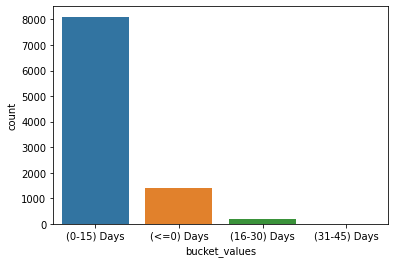

In [83]:
sns.countplot(x = 'bucket_values', data = testData)

In [84]:
testData['bucket_values'].value_counts()

(0-15) Days     8102
(<=0) Days      1414
(16-30) Days     191
(31-45) Days      15
Name: bucket_values, dtype: int64

In [85]:
y_predict = lr_clf.predict(X_test)

from sklearn import metrics
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_predict, squared=False))
print('Root Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_predict, squared=False)))

Mean Squared error :  10.127806411909404
Root Mean Squared error :  3.1824214698731224


In [86]:
y_predict = randomForestModel.predict(X_test)

from sklearn import metrics
print('Mean Squared error : ',metrics.mean_squared_error(y_test, y_predict, squared=False))
print('Root Mean Squared error : ',np.sqrt(metrics.mean_squared_error(y_test, y_predict, squared=False)))

Mean Squared error :  8.424342113029507
Root Mean Squared error :  2.902471724759693


In [87]:
testData = testData.astype({'predicted_clear_date':'int32','posting_date':'int32','document_create_date':'int32','due_in_date':'int32','baseline_create_date':'int32'})

testData['predicted_clear_date']=testData['predicted_clear_date'].apply(dt.datetime.fromordinal)
testData['posting_date']=testData['posting_date'].apply(dt.datetime.fromordinal)
testData['document_create_date']=testData['document_create_date'].apply(dt.datetime.fromordinal)
testData['due_in_date']=testData['due_in_date'].apply(dt.datetime.fromordinal)
testData['baseline_create_date']=testData['baseline_create_date'].apply(dt.datetime.fromordinal)
testData.head()

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,predicted_clear_date,bucket_values
0,1.0,9184.0,1.930815e+09,2020-04-28,2020-04-22,2020-05-13,6361.07,2020-04-28,3011.0,1.930815e+09,7,2020-05-20,(0-15) Days
2,1.0,9184.0,1.930666e+09,2020-03-16,2020-03-17,2020-03-16,5095.68,2020-03-16,70.0,1.930666e+09,-10,2020-03-06,(<=0) Days
10,1.0,9184.0,1.930711e+09,2020-03-28,2020-03-27,2020-04-12,31228.04,2020-03-28,3011.0,1.930711e+09,4,2020-04-16,(0-15) Days
11,1.0,9184.0,1.930843e+09,2020-05-01,2020-04-30,2020-05-16,40491.29,2020-05-01,3011.0,1.930843e+09,4,2020-05-20,(0-15) Days
16,1.0,9184.0,1.930838e+09,2020-04-29,2020-04-29,2020-05-14,18453.58,2020-04-29,3011.0,1.930838e+09,4,2020-05-18,(0-15) Days


In [88]:
testData.dtypes

USD                            float64
business_code                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
baseline_create_date    datetime64[ns]
cust_payment_terms             float64
invoice_id                     float64
delay                            int32
predicted_clear_date    datetime64[ns]
bucket_values                   object
dtype: object

In [89]:
testData.reset_index(drop=True)

,USD,business_code,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,delay,predicted_clear_date,bucket_values
0,1.0,9184.0,1.930815e+09,2020-04-28,2020-04-22,2020-05-13,6361.07,2020-04-28,3011.0,1.930815e+09,7,2020-05-20,(0-15) Days
1,1.0,9184.0,1.930666e+09,2020-03-16,2020-03-17,2020-03-16,5095.68,2020-03-16,70.0,1.930666e+09,-10,2020-03-06,(<=0) Days
2,1.0,9184.0,1.930711e+09,2020-03-28,2020-03-27,2020-04-12,31228.04,2020-03-28,3011.0,1.930711e+09,4,2020-04-16,(0-15) Days
3,1.0,9184.0,1.930843e+09,2020-05-01,2020-04-30,2020-05-16,40491.29,2020-05-01,3011.0,1.930843e+09,4,2020-05-20,(0-15) Days
4,1.0,9184.0,1.930838e+09,2020-04-29,2020-04-29,2020-05-14,18453.58,2020-04-29,3011.0,1.930838e+09,4,2020-05-18,(0-15) Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,1.0,9184.0,1.930862e+09,2020-05-06,2020-05-06,2020-05-21,171301.72,2020-05-06,4096.0,1.930862e+09,1,2020-05-22,(0-15) Days
9718,1.0,9184.0,1.930826e+09,2020-04-25,2020-04-25,2020-05-09,2241.22,2020-04-16,260.0,1.930826e+09,0,2020-05-09,(<=0) Days
9719,1.0,9184.0,1.930760e+09,2020-04-09,2020-04-07,2020-04-24,6540.07,2020-04-09,3011.0,1.930760e+09,6,2020-04-30,(0-15) Days
9720,1.0,9184.0,1.930660e+09,2020-03-17,2020-03-16,2020-05-21,6276.46,2020-03-17,307.0,1.930660e+09,0,2020-05-21,(<=0) Days


In [94]:
import json

testData['posting_date'] = testData['posting_date'].astype(str)
testData['document_create_date'] = testData['document_create_date'].astype(str)
testData['due_in_date'] = testData['due_in_date'].astype(str)
testData['baseline_create_date'] = testData['baseline_create_date'].astype(str)
testData['predicted_clear_date'] = testData['predicted_clear_date'].astype(str)

invoice_data = testData.to_dict(orient='records')
with open('invoices.json', 'w') as f:
    json.dump(invoice_data, f, indent=4)